<a href="https://colab.research.google.com/github/yxrellx/Algoritmos-con-ARREGLOS/blob/main/RandomForest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd

In [112]:
df = pd.read_csv('/content/conarreglo.csv')
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,quimio_terapia(2),radio_terapia(2)
0,0,75,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,"""""",0,Claudin-low,1,Positve,...,0,0,0,0,0,0,0,0.001280,SI,SI
1,2,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,1,0,0,0,1,1,0,0.000276,SI,SI
2,5,48,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumA,1,Positve,...,1,1,0,0,1,2,1,0.000856,No,No
3,6,47,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,1,2,0,1,1,2,0,0.001462,No,SI
4,8,76,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,2,0,1,1,1,1,0.002373,No,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,1,1,0,2,1,5,0,0.014624,SI,SI
1900,7296,42,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,1,5,2,0,0,2,1,0.001159,SI,SI
1901,7297,62,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,0,8,1,0,1,2,1,0.000658,SI,SI
1902,7298,61,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4,Positve,...,0,8,2,0,1,4,2,0.000658,SI,No


In [113]:
df =df.drop(['patient_id','type_of_breast_surgery','cancer_type','cancer_type_detailed',"cellularity","pam50_+_claudin-low_subtype","er_status_measured_by_ihc","er_status", "her2_status_measured_by_snp6", "her2_status", "tumor_other_histologic_subtype", "inferred_menopausal_state","integrative_cluster", "primary_tumor_laterality","oncotree_code","pr_status","3-gene_classifier_subtype", "death_from_cancer","quimio_terapia(2)", "radio_terapia(2)"],axis=1)
df

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,75,0,1,3,1,10,8,0.010013,1.405468e-07,1,...,0,0,0,0,0,0,0,0,0,0.001280
1,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
2,48,1,1,2,1,1,2,0.000065,1.637546e-07,0,...,0,0,1,1,0,0,1,2,1,0.000856
3,47,1,1,2,1,3,1,0.000065,1.649883e-01,1,...,0,1,1,2,0,1,1,2,0,0.001462
4,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,1,0,2,0,1,1,1,1,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43,0,4,3,1,1,4,0.000082,1.969323e-01,1,...,0,2,1,1,0,2,1,5,0,0.014624
1900,42,0,4,3,0,1,6,0.000082,4.474825e-01,0,...,1,0,1,5,2,0,0,2,1,0.001159
1901,62,0,4,3,1,45,4,0.000099,1.760253e-01,0,...,0,0,0,8,1,0,1,2,1,0.000658
1902,61,0,4,2,1,12,15,0.000082,8.626209e-01,0,...,0,0,0,8,2,0,1,4,2,0.000658


In [114]:
X = df.copy()
X = X.drop(['death_from_cancer (2)'], axis=1)
X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
0,75,0,1,3,1,10,8,0.010013,1.405468e-07,1,...,0,0,0,0,0,0,0,0,0,0.001280
1,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,0,1,0,0,0,1,1,0.000276
2,48,1,1,2,1,1,2,0.000065,1.637546e-07,0,...,0,0,0,1,1,0,0,1,2,0.000856
3,47,1,1,2,1,3,1,0.000065,1.649883e-01,1,...,0,0,1,1,2,0,1,1,2,0.001462
4,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,0,1,0,2,0,1,1,1,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43,0,4,3,1,1,4,0.000082,1.969323e-01,1,...,0,0,2,1,1,0,2,1,5,0.014624
1900,42,0,4,3,0,1,6,0.000082,4.474825e-01,0,...,2,1,0,1,5,2,0,0,2,0.001159
1901,62,0,4,3,1,45,4,0.000099,1.760253e-01,0,...,0,0,0,0,8,1,0,1,2,0.000658
1902,61,0,4,2,1,12,15,0.000082,8.626209e-01,0,...,0,0,0,0,8,2,0,1,4,0.000658


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['death_from_cancer (2)'],
                                                    test_size=0.2, random_state=42
                                                    )

In [116]:
X_train

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
1673,70,0,4,1,1,2,2,0.005059,4.534845e-01,1,...,0,0,0,0,6,0,0,0,5,0.020561
1778,83,0,4,3,1,1,5,0.000082,2.900967e-09,0,...,0,0,0,0,0,2,0,0,4,0.018541
339,48,1,1,3,1,0,1,0.006700,7.152384e-09,1,...,2,0,0,1,6,0,0,1,5,0.001220
1315,75,0,3,3,1,1,2,0.000083,2.432477e-01,1,...,2,0,2,0,5,1,2,0,6,0.002373
1278,55,0,3,1,0,0,7,0.000032,1.902301e-01,1,...,0,0,0,0,6,0,0,1,5,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,53,0,3,2,1,1,5,0.000065,9.473158e-09,1,...,0,0,0,0,1,1,0,1,5,0.001462
1294,74,0,3,2,1,1,3,0.000066,1.420473e-09,0,...,0,0,0,0,8,1,0,0,4,0.002979
860,56,0,3,2,0,0,13,0.000049,3.077359e-01,1,...,0,0,0,0,6,1,0,1,2,0.000579
1459,70,0,3,2,1,0,5,0.000049,1.851951e-01,1,...,0,0,0,0,6,0,0,1,5,0.020282


In [117]:
X_test

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
1225,63,0,3,1,0,0,6,0.000032,1.313438e-08,0,...,0,0,0,0,6,1,0,1,5,0.000579
111,86,1,1,3,1,1,2,0.000082,5.878626e-01,0,...,0,0,0,0,3,0,0,1,4,0.001462
554,56,0,2,2,0,1,8,0.006661,1.538846e-01,0,...,0,0,0,0,1,1,0,0,0,0.000246
526,65,0,2,3,1,0,2,0.006687,2.279426e-01,0,...,2,0,0,0,1,1,0,1,5,0.000488
1313,56,0,3,3,1,0,5,0.000065,1.258086e-01,0,...,0,0,6,0,1,1,0,1,5,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,65,0,4,3,0,0,2,0.006674,8.026009e-01,1,...,0,0,0,0,4,2,0,0,0,0.008444
583,45,1,2,3,0,8,8,0.000099,1.440480e-09,0,...,2,0,0,1,8,0,0,0,4,0.002194
1866,74,0,4,3,1,5,9,0.000099,3.501167e-09,0,...,2,0,0,0,0,2,0,0,0,0.031037
141,51,0,1,2,1,0,5,0.005032,1.990664e-08,1,...,0,0,0,0,6,1,0,1,5,0.000519


In [118]:
y_train

1673    0
1778    2
339     0
1315    0
1278    0
       ..
1130    0
1294    2
860     0
1459    0
1126    0
Name: death_from_cancer (2), Length: 1523, dtype: int64

In [119]:
y_test

1225    2
111     2
554     2
526     2
1313    1
       ..
1691    0
583     1
1866    2
141     0
1007    1
Name: death_from_cancer (2), Length: 381, dtype: int64

RANDOM FOREST


In [120]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.8136482939632546
precision: 0.8007746308399902
recall: 0.7891607704402516
f1: 0.8136482939632546


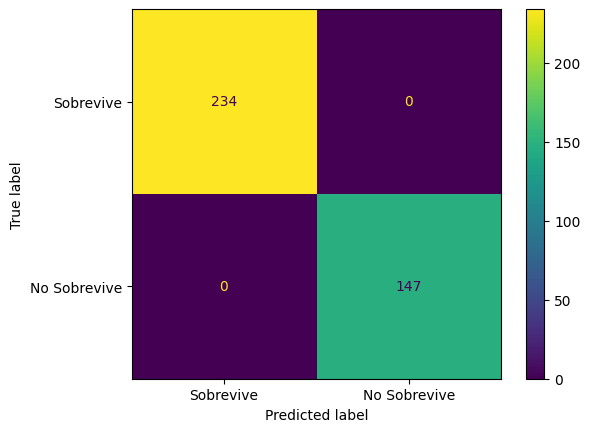

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')

MEJORA- Muerte por cancer

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['death_from_cancer (2)'],
                                                    test_size=0.2, random_state=63
                                                    )

In [123]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.8398950131233596
precision: 0.8195641289166469
recall: 0.8161719233147804
f1: 0.8398950131233596


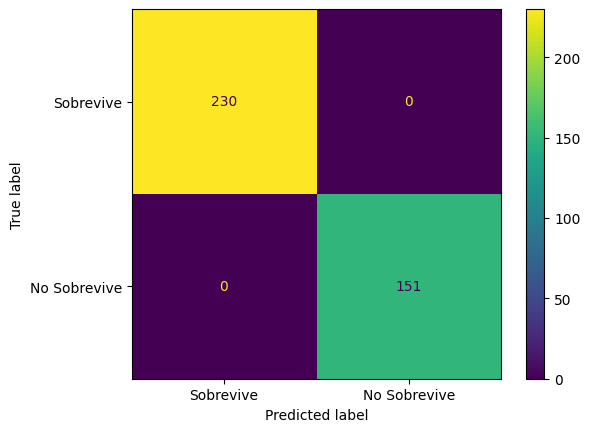

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')

Quimioterapia

In [125]:
X = df.copy()
X = X.drop(['chemotherapy'], axis=1)
X

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,75,1,3,1,10,8,0.010013,1.405468e-07,1,1,...,0,0,0,0,0,0,0,0,0,0.001280
1,43,1,3,1,0,2,0.000065,8.466155e-01,1,1,...,0,0,1,0,0,0,1,1,0,0.000276
2,48,1,2,1,1,2,0.000065,1.637546e-07,0,0,...,0,0,1,1,0,0,1,2,1,0.000856
3,47,1,2,1,3,1,0.000065,1.649883e-01,1,1,...,0,1,1,2,0,1,1,2,0,0.001462
4,76,1,3,1,8,2,0.000099,4.138046e-01,0,1,...,0,1,0,2,0,1,1,1,1,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43,4,3,1,1,4,0.000082,1.969323e-01,1,1,...,0,2,1,1,0,2,1,5,0,0.014624
1900,42,4,3,0,1,6,0.000082,4.474825e-01,0,1,...,1,0,1,5,2,0,0,2,1,0.001159
1901,62,4,3,1,45,4,0.000099,1.760253e-01,0,1,...,0,0,0,8,1,0,1,2,1,0.000658
1902,61,4,2,1,12,15,0.000082,8.626209e-01,0,0,...,0,0,0,8,2,0,1,4,2,0.000658


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['chemotherapy'],
                                                    test_size=0.2, random_state=42
                                                    )

In [127]:
X_train

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
1673,70,4,1,1,2,2,0.005059,4.534845e-01,1,1,...,0,0,0,6,0,0,0,5,0,0.020561
1778,83,4,3,1,1,5,0.000082,2.900967e-09,0,0,...,0,0,0,0,2,0,0,4,2,0.018541
339,48,1,3,1,0,1,0.006700,7.152384e-09,1,1,...,0,0,1,6,0,0,1,5,0,0.001220
1315,75,3,3,1,1,2,0.000083,2.432477e-01,1,0,...,0,2,0,5,1,2,0,6,0,0.002373
1278,55,3,1,0,0,7,0.000032,1.902301e-01,1,1,...,0,0,0,6,0,0,1,5,0,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,53,3,2,1,1,5,0.000065,9.473158e-09,1,1,...,0,0,0,1,1,0,1,5,0,0.001462
1294,74,3,2,1,1,3,0.000066,1.420473e-09,0,0,...,0,0,0,8,1,0,0,4,2,0.002979
860,56,3,2,0,0,13,0.000049,3.077359e-01,1,1,...,0,0,0,6,1,0,1,2,0,0.000579
1459,70,3,2,1,0,5,0.000049,1.851951e-01,1,1,...,0,0,0,6,0,0,1,5,0,0.020282


In [129]:
X_test

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
1225,63,3,1,0,0,6,0.000032,1.313438e-08,0,0,...,0,0,0,6,1,0,1,5,2,0.000579
111,86,1,3,1,1,2,0.000082,5.878626e-01,0,1,...,0,0,0,3,0,0,1,4,2,0.001462
554,56,2,2,0,1,8,0.006661,1.538846e-01,0,1,...,0,0,0,1,1,0,0,0,2,0.000246
526,65,2,3,1,0,2,0.006687,2.279426e-01,0,1,...,0,0,0,1,1,0,1,5,2,0.000488
1313,56,3,3,1,0,5,0.000065,1.258086e-01,0,1,...,0,6,0,1,1,0,1,5,1,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,65,4,3,0,0,2,0.006674,8.026009e-01,1,1,...,0,0,0,4,2,0,0,0,0,0.008444
583,45,2,3,0,8,8,0.000099,1.440480e-09,0,1,...,0,0,1,8,0,0,0,4,1,0.002194
1866,74,4,3,1,5,9,0.000099,3.501167e-09,0,0,...,0,0,0,0,2,0,0,0,2,0.031037
141,51,1,2,1,0,5,0.005032,1.990664e-08,1,0,...,0,0,0,6,1,0,1,5,0,0.000519


In [130]:
y_train

1673    0
1778    0
339     1
1315    0
1278    0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: chemotherapy, Length: 1523, dtype: int64

In [131]:
y_test


1225    0
111     1
554     0
526     0
1313    0
       ..
1691    0
583     1
1866    0
141     0
1007    0
Name: chemotherapy, Length: 381, dtype: int64

In [132]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9448818897637795
precision: 0.9315191387559809
recall: 0.9048821548821548
f1: 0.9448818897637795


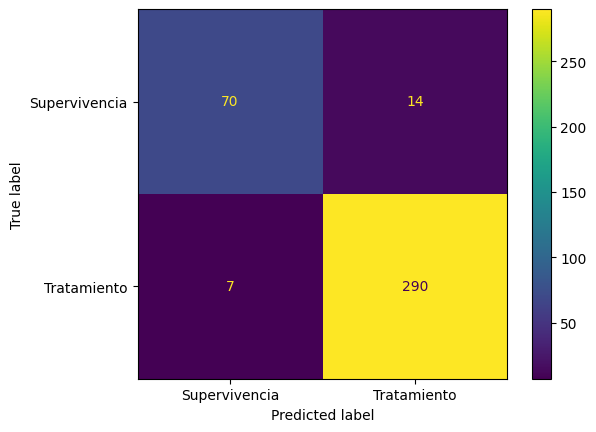

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Supervivencia','Tratamiento']).plot(values_format='d')

In [ ]:
MEJORA-quimioterapia

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['chemotherapy'],
                                                    test_size=0.2, random_state=60
                                                    )

In [138]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9606299212598425
precision: 0.957935735150925
recall: 0.9140329254335768
f1: 0.9606299212598425


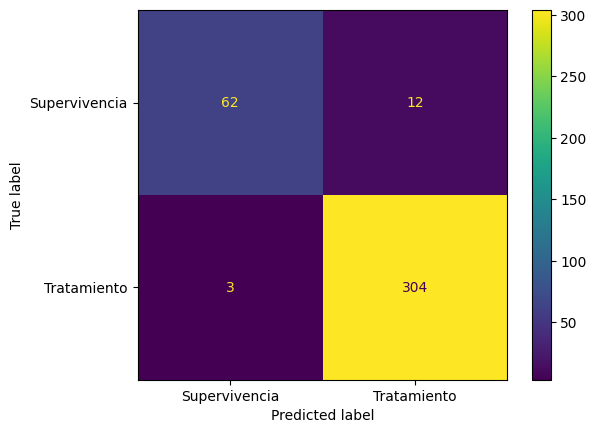

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Supervivencia','Tratamiento']).plot(values_format='d')

tumor_otro_subtipo_histológico(2)

In [140]:
X = df.copy()
X = X.drop(['tumor_other_histologic_subtype (2)'], axis=1)
X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,75,0,1,3,1,10,8,0.010013,1.405468e-07,1,...,0,0,0,0,0,0,0,0,0,0.001280
1,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
2,48,1,1,2,1,1,2,0.000065,1.637546e-07,0,...,0,0,1,1,0,0,1,2,1,0.000856
3,47,1,1,2,1,3,1,0.000065,1.649883e-01,1,...,0,0,1,2,0,1,1,2,0,0.001462
4,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,0,0,2,0,1,1,1,1,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43,0,4,3,1,1,4,0.000082,1.969323e-01,1,...,0,0,1,1,0,2,1,5,0,0.014624
1900,42,0,4,3,0,1,6,0.000082,4.474825e-01,0,...,2,1,1,5,2,0,0,2,1,0.001159
1901,62,0,4,3,1,45,4,0.000099,1.760253e-01,0,...,0,0,0,8,1,0,1,2,1,0.000658
1902,61,0,4,2,1,12,15,0.000082,8.626209e-01,0,...,0,0,0,8,2,0,1,4,2,0.000658


In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['tumor_other_histologic_subtype (2)'],
                                                    test_size=0.2, random_state=42
                                                    )

In [142]:
X_train

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
1673,70,0,4,1,1,2,2,0.005059,4.534845e-01,1,...,0,0,0,6,0,0,0,5,0,0.020561
1778,83,0,4,3,1,1,5,0.000082,2.900967e-09,0,...,0,0,0,0,2,0,0,4,2,0.018541
339,48,1,1,3,1,0,1,0.006700,7.152384e-09,1,...,2,0,1,6,0,0,1,5,0,0.001220
1315,75,0,3,3,1,1,2,0.000083,2.432477e-01,1,...,2,0,0,5,1,2,0,6,0,0.002373
1278,55,0,3,1,0,0,7,0.000032,1.902301e-01,1,...,0,0,0,6,0,0,1,5,0,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,53,0,3,2,1,1,5,0.000065,9.473158e-09,1,...,0,0,0,1,1,0,1,5,0,0.001462
1294,74,0,3,2,1,1,3,0.000066,1.420473e-09,0,...,0,0,0,8,1,0,0,4,2,0.002979
860,56,0,3,2,0,0,13,0.000049,3.077359e-01,1,...,0,0,0,6,1,0,1,2,0,0.000579
1459,70,0,3,2,1,0,5,0.000049,1.851951e-01,1,...,0,0,0,6,0,0,1,5,0,0.020282


In [143]:
X_test

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
1225,63,0,3,1,0,0,6,0.000032,1.313438e-08,0,...,0,0,0,6,1,0,1,5,2,0.000579
111,86,1,1,3,1,1,2,0.000082,5.878626e-01,0,...,0,0,0,3,0,0,1,4,2,0.001462
554,56,0,2,2,0,1,8,0.006661,1.538846e-01,0,...,0,0,0,1,1,0,0,0,2,0.000246
526,65,0,2,3,1,0,2,0.006687,2.279426e-01,0,...,2,0,0,1,1,0,1,5,2,0.000488
1313,56,0,3,3,1,0,5,0.000065,1.258086e-01,0,...,0,0,0,1,1,0,1,5,1,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,65,0,4,3,0,0,2,0.006674,8.026009e-01,1,...,0,0,0,4,2,0,0,0,0,0.008444
583,45,1,2,3,0,8,8,0.000099,1.440480e-09,0,...,2,0,1,8,0,0,0,4,1,0.002194
1866,74,0,4,3,1,5,9,0.000099,3.501167e-09,0,...,2,0,0,0,2,0,0,0,2,0.031037
141,51,0,1,2,1,0,5,0.005032,1.990664e-08,1,...,0,0,0,6,1,0,1,5,0,0.000519


In [144]:
y_train

1673    0
1778    0
339     0
1315    2
1278    0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: tumor_other_histologic_subtype (2), Length: 1523, dtype: int64

In [145]:
y_test

1225    0
111     0
554     0
526     0
1313    6
       ..
1691    0
583     0
1866    0
141     0
1007    0
Name: tumor_other_histologic_subtype (2), Length: 381, dtype: int64

In [146]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.952755905511811
precision: 0.6442913501737031
recall: 0.47804232804232805
f1: 0.952755905511811


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


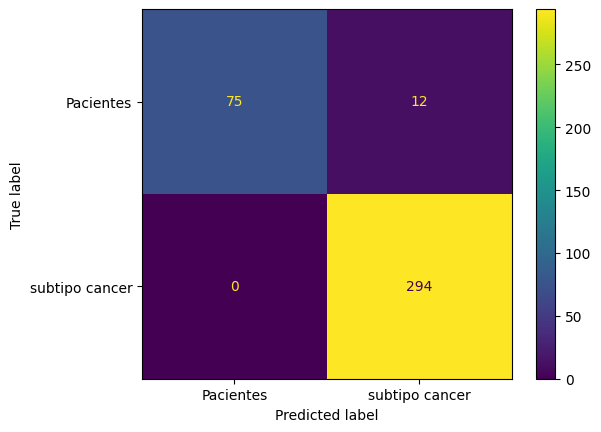

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','subtipo cancer']).plot(values_format='d')

MEJORA-tumor_otro_subtipo_histológico(2)

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['tumor_other_histologic_subtype (2)'],
                                                    test_size=0.2, random_state=57
                                                    )

In [152]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.958005249343832
precision: 0.5303815789473684
recall: 0.5266602192134107
f1: 0.958005249343832


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


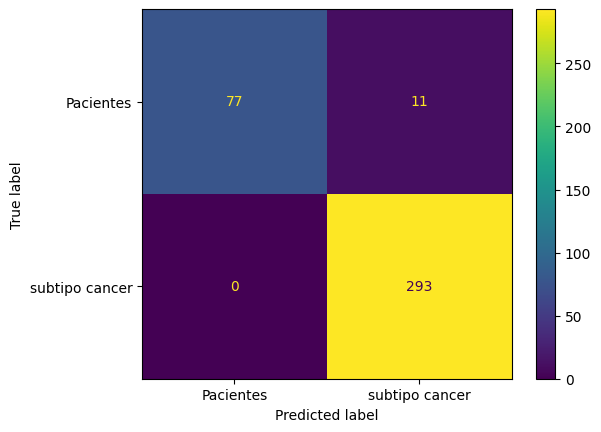

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','subtipo cancer']).plot(values_format='d')

Terapia hormonal

In [154]:
X = df.copy()
X = X.drop(['hormone_therapy'], axis=1)
X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,75,0,1,3,10,8,0.010013,1.405468e-07,1,1,...,0,0,0,0,0,0,0,0,0,0.001280
1,43,0,1,3,0,2,0.000065,8.466155e-01,1,1,...,0,0,1,0,0,0,1,1,0,0.000276
2,48,1,1,2,1,2,0.000065,1.637546e-07,0,0,...,0,0,1,1,0,0,1,2,1,0.000856
3,47,1,1,2,3,1,0.000065,1.649883e-01,1,1,...,0,1,1,2,0,1,1,2,0,0.001462
4,76,1,1,3,8,2,0.000099,4.138046e-01,0,1,...,0,1,0,2,0,1,1,1,1,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43,0,4,3,1,4,0.000082,1.969323e-01,1,1,...,0,2,1,1,0,2,1,5,0,0.014624
1900,42,0,4,3,1,6,0.000082,4.474825e-01,0,1,...,1,0,1,5,2,0,0,2,1,0.001159
1901,62,0,4,3,45,4,0.000099,1.760253e-01,0,1,...,0,0,0,8,1,0,1,2,1,0.000658
1902,61,0,4,2,12,15,0.000082,8.626209e-01,0,0,...,0,0,0,8,2,0,1,4,2,0.000658


In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['hormone_therapy'],
                                                    test_size=0.2, random_state=42
                                                    )

In [156]:
X_test

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
1225,63,0,3,1,0,6,0.000032,1.313438e-08,0,0,...,0,0,0,6,1,0,1,5,2,0.000579
111,86,1,1,3,1,2,0.000082,5.878626e-01,0,1,...,0,0,0,3,0,0,1,4,2,0.001462
554,56,0,2,2,1,8,0.006661,1.538846e-01,0,1,...,0,0,0,1,1,0,0,0,2,0.000246
526,65,0,2,3,0,2,0.006687,2.279426e-01,0,1,...,0,0,0,1,1,0,1,5,2,0.000488
1313,56,0,3,3,0,5,0.000065,1.258086e-01,0,1,...,0,6,0,1,1,0,1,5,1,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,65,0,4,3,0,2,0.006674,8.026009e-01,1,1,...,0,0,0,4,2,0,0,0,0,0.008444
583,45,1,2,3,8,8,0.000099,1.440480e-09,0,1,...,0,0,1,8,0,0,0,4,1,0.002194
1866,74,0,4,3,5,9,0.000099,3.501167e-09,0,0,...,0,0,0,0,2,0,0,0,2,0.031037
141,51,0,1,2,0,5,0.005032,1.990664e-08,1,0,...,0,0,0,6,1,0,1,5,0,0.000519


In [157]:
y_train

1673    1
1778    1
339     1
1315    1
1278    0
       ..
1130    1
1294    1
860     0
1459    1
1126    1
Name: hormone_therapy, Length: 1523, dtype: int64

In [158]:
y_test

1225    0
111     1
554     0
526     1
1313    1
       ..
1691    0
583     0
1866    1
141     1
1007    1
Name: hormone_therapy, Length: 381, dtype: int64

In [159]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.8267716535433071
precision: 0.5400756793945648
recall: 0.5525421672127169
f1: 0.8267716535433071


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


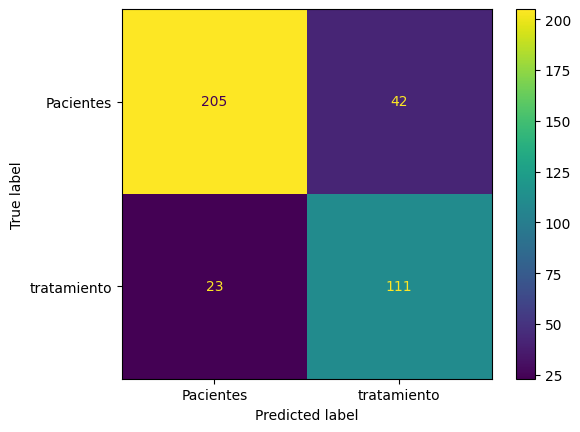

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','tratamiento']).plot(values_format='d')

In [ ]:
MEJORA- terapia hormonal

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['hormone_therapy'],
                                                    test_size=0.2, random_state=53
                                                    )

In [165]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.8320209973753281
precision: 0.8213209219858156
recall: 0.8194893341952165
f1: 0.8320209973753281


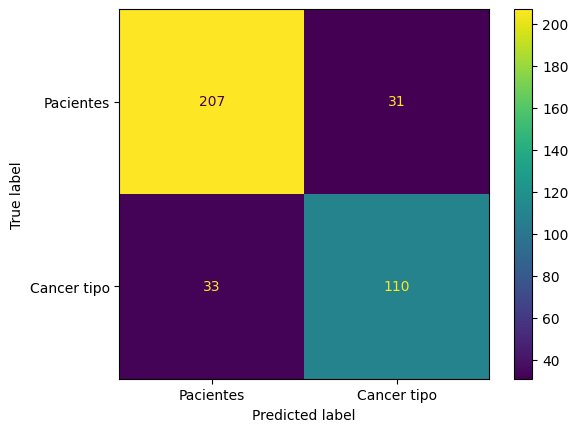

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','Cancer tipo']).plot(values_format='d')